<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Bildverarbeitung

Die nachfolgenden Aufgaben behandeln das Einlesen und Bearbeiten von Bilddateien. Verwenden das Modul `Matplotlib` zum Einlesen und Darstellen der Dateien und `Numpy` zur Datenverarbeitung. JPEG Bilder wie sie im Folgenden verwendet werden, können mittels Python als dreidimensionales Array eingelesen werden. Oftmals empfiehlt es sich die Bearbeitung getrennt für die drei Farbkanäle $(R, G, B)$ vorzunehmen. Sämtliche Bilder können zur lokalen Bearbeitung der Aufgaben hier heruntergeladen heruntergeladen werden: {download}`Bilder.zip`.
Die Bilder befinden sich ebenfalls auf dem JupyterHub zur Vorlesung und können wie folgt adressiert werden:
```
image_dir = '/srv/images/'
image = image_dir + 'imagename.jpg'
bild_array = plt.imread(image)
```

## Weißabgleich
Der Weißabgleich dient der Anpassung der Farbtemperatur eines Fotos an die Lichtbedingungen des Aufnahmeortes. Dies kann erreicht werden, indem die Intensitäten der drei Farbkanäle des Fotos anhand eines Referenzpixels skaliert werden. Der Referenzpixel wird dabei aus einem Bereich des Bildes ausgewählt, der wahrheitsgemäß als weiß oder grau angenommen wird. Für die Übung benötigen Sie das Bild "Weissabgleich.jpg"

### Aufgabe
Nachfolgendes Foto weist durch einen falschen Weißabgleich einen erheblichen Blaustich auf. Wählen Sie einen Referenzpixel innerhalb des Bildes und korrigieren Sie die Intensitäten der drei Farbkanäle auf ein einheitliches Niveau. Skalieren Sie sämtliche Pixel des Bildes anhand der zuvor bestimmten Korrekturfaktoren.

Orientieren Sie sich dabei an den folgenden Bearbeitungsschritten:

1. Lesen Sie das Bild mit `Matplotlib` als dreidimensionales `Numpy.array` ein.
2. Extrahieren Sie die Werte für die drei Farbkanäle für einen einzigen Referenzpixel innerhalb des Bildes, welcher in der Realität idealerweise einen Weiß- oder Grauton aufweist, für den also gilt $R = G = B$.
2. Bestimmen Sie die Skalierungsfaktoren, die erforderlich sind um ein Farbgleichgewicht für diesen Pixel zu erreichen. Normieren Sie diese auf den grünen Farbkanal (Kanal 1).
4. Skalieren Sie die Farbwerte sämtlicher Pixel des Bildes mit den Skalierungsfaktoren.
5. Stellen Sie das modifizierte `Numpy.array` erneut mit `Matplotlib` dar.

```{admonition} Hinweis
:class: note
Beachten Sie, dass die Funktion `matplotlib.imshow` lediglich die Ausgabe von RGB Bildern mit Integerwerten, also Ganzzahlen erlaubt. Floatwerte (Fließkommazahlen) müssen vorab entsprechend gerundet bzw. konvertiert werden.
```

:::{figure-md} fig-Weißabgleich
<img src="./bilder/weissabgleich.jpg" width="100%">

Foto mit falschem Weißabgleich und starkem Blaustich
:::

```{admonition} Hinweis
:class: note
Die Koordinaten beim Auslesen von Pixeldaten mit Numpy entsprechen den Indizes des `Numpy.array` und sind demnach gegenüber der Ausgabe mit Matplotlib transponiert.
```

### Lösungsvorschlag
```{toggle}
Als Referenzpixel wird ein Punkt mit den Pixel-Koordinaten x = 3900, y = 1300 auf der Mühle gewählt, von dem angenommen wird, dass er in Wirklichkeit annähernd perfekt weiß ist.
```

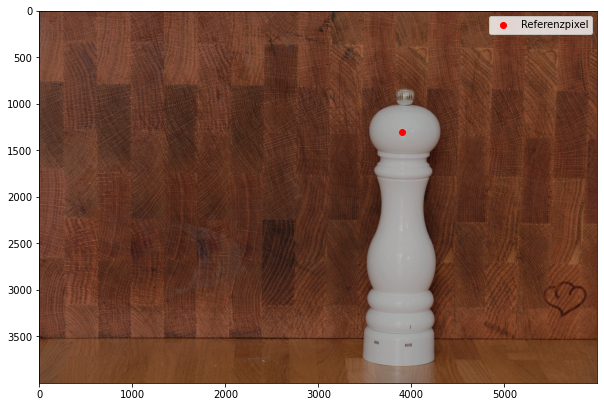

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Laden der Bilddateie als Numpy.array
image = plt.imread('bilder/Weissabgleich.jpg')

# Auslesen der Farbwerte eines Referenzpixels
x = 3900
y = 1300
ref_pixel = image[y,x]

# Berechnung der Skalierungsfaktoren und Normierung anhand des grünen Farbkanals
rgb_scale = ref_pixel/ref_pixel[1]

# Weißabgleich des gesamten Bildes anhand der Skallierungsfaktoren
image_wb = (image/rgb_scale).astype('uint8')

# Darstellen des korrigierten Bildes
fig = plt.figure(figsize=(10,10))
plt.scatter(x,y, color='red', label="Referenzpixel")
plt.imshow(image_wb)
plt.legend(loc='best')
plt.show()

## Image Stacking
Der Begriff "Image Stacking" bezeichnet allgemein das Überlagern von Bildern um unterschiedliche Effekte und Wirkungen zu erzielen. Neben dem Erzeugen von künstlerischen Effekten können auf diese Weise auch bewegte Objekte aus einer Bildserie des selben Bildausschnittes entfernt werden.

Für diese Aufgabe benötigen Sie die Bilder "Image_stackig_1.jpg" - "Image_stacking_5.jpg"

:::{figure-md} fig-image-stacking
<img src="./bilder/Stacking_bildserie.jpg" width="800">

Bildserie des selben Bildauschnittes mit "bewegtem" Objekt
:::

### Aufgabenteil 1
Überlagern Sie alle Bilder der genannten Bildserie, indem Sie den Durchschnitt der Farbwerte eines jeden Pixels bilden. Gehen Sie dazu wie folgt vor:
1. Lesen Sie das Bild mit `Matplotlib` als dreidimensionales `Numpy.array` ein und separieren Sie die Farbkanäle als zweidimensionale Arrays
2. Bilden Sie die Durschnittswerte der monochromatischen Bildarrays aus den Bildserien unter Anwendung der `Numpy.mean` Funktion. Tip: Verwenden Sie eine Schleife zum Einlesen der Daten und speichern Sie die Arrays in einer Liste zwischen.
3. Fügen Sie die Arrays mit den Durchschnittswerten wieder zu einem dreidimensionalen Array zusammen und plotten Sie das Ergebnis.



### Lösungsvorschlag

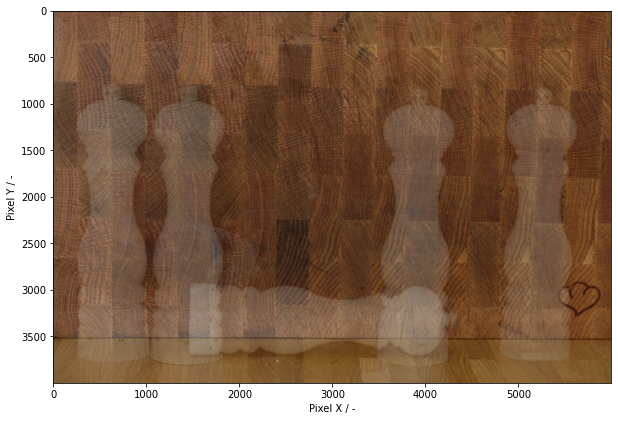

In [2]:
# Anlegen von Listen zum Speichern der `Numpy.array`s aus den einzelnen Bildern
r_layers = []
g_layers = []
b_layers = []

# Einlesen der Bilder und Separieren der Farbkanäle
for i in range(1,6)[0:5]:
    image = plt.imread(f'bilder/Image_stacking_{i}.jpg')
    r_layers.append(image[:,:,0])
    g_layers.append(image[:,:,1])
    b_layers.append(image[:,:,2])
    
# Berechung der durchschnittlichen Farbwerte
r_mean = np.mean(r_layers, axis=0)
g_mean = np.mean(g_layers, axis=0)
b_mean = np.mean(b_layers, axis=0)

# Zusammenfassen der eizelnen Farbkanäle 
rgb_mean = np.dstack((r_mean, g_mean, b_mean)).astype('uint8')

# Darstellen der überlagerten Bildserie
fig = plt.figure(figsize=(10,10))
plt.imshow(rgb_mean)
plt.xlabel("Pixel X / -")
plt.ylabel("Pixel Y / -")
plt.show()

### Aufgabenteil 2
Überlagern Sie erneut die einzelnen Bilder und wenden Sie einen Hochpassfilter (z.B. Median) auf die einzelnen Farbkanäle an um stark abweichende Farbwerte aus dem Bild zu eliminieren. Führen Sie hierzu die Arbeitsschritte aus Aufgabenteil 1 aus. Verwenden Sie statt der Funktion zur Berechnung des Durchschnitts z.B. `Numpy.median`. Überlegen Sie vorab, welcher Effekt hierdurch in Bezug auf das überlagerte Bild erzielt wird.

### Lösungsvorschlag

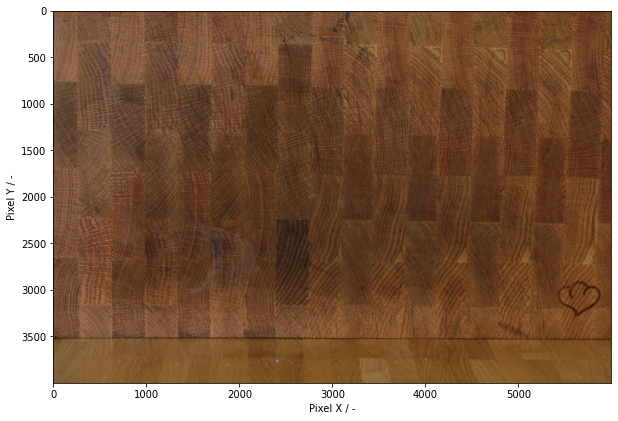

In [3]:
# Berechung des Medians der Farbwerte
r_med = np.median(r_layers, axis=0)
g_med = np.median(g_layers, axis=0)
b_med = np.median(b_layers, axis=0)

# Zusammenfassen der eizelnen Farbkanäle 
rgb_med = np.dstack((r_med, g_med, b_med)).astype('uint8')

# Darstellen der überlagerten Bildserie
fig = plt.figure(figsize=(10,10))
plt.imshow(rgb_med)
plt.xlabel("Pixel X / -")
plt.ylabel("Pixel Y / -")
plt.show()

## Freistellen von Objekten
Das Freistellen von Objekten kann über verschiedene Methoden mit unterschiedlicher Komplexizität erfolgen. Eine einfache, wenn auch äußerst fehleranfällige Methode ist das Maskieren anhand eines Schwellenwertes einer oder mehrerer Farbkanäle.

### Aufgabe
Für die Übung benötigen Sie die Bilder "Freistellen_objekt.jpg" und "Freistellen_hintergrund.jpg". Maskieren Sie die Bereiche um die Kerze herum anhand von oberen oder unteren Schwellenwerten eines oder mehrerer Farbkanäle. Platzieren Sie die Kerze anschließend innerhalb des zweiten Bildes. 

Orientieren Sie sich an folgenden Arbeitsschritten:
1. Definieren Sie einen unteren Schwellenwert zwischen 0 und 255 für den roten Farbkanal. Legen Sie im erste Schritt eine beliebigen Wert fest und iterieren Sie diesen, bis das gewünschte Ergebnis erreicht ist.
2. Bilden Sie das Bild 'Freistellen_objekt.jpg' als dreidimensionales `Numpy.array` ab und separieren Sie die einzelnen Farbkanäle als zweidimensionale Arrays.
3. Erstellen Sie eine Maske, welche nur die Pixelkoordinaten berücksichtigt, in denen der festgelegte Schwellenwert überschritten wird. Nutze Sie hierfür z.B. die Funktion `Numpy.where`.
4. Weisen Sie den maskierten Pixel einen fixen Farbwert zu um einen einfarbigen Hintergrund zu erhalten
5. Weisen Sie den maskierten Pixeln die entsprechenden Pixel mit den selben Koordinaten aus dem Bild "Freistellen_hintergrund.jpg" zu.

:::{figure-md} fig-image-freistellen
<img src="./bilder/Freistellen_bildserie.jpg" width="80%">
    
Objekt und Hintergrund
:::

### Lösungsvorschlag

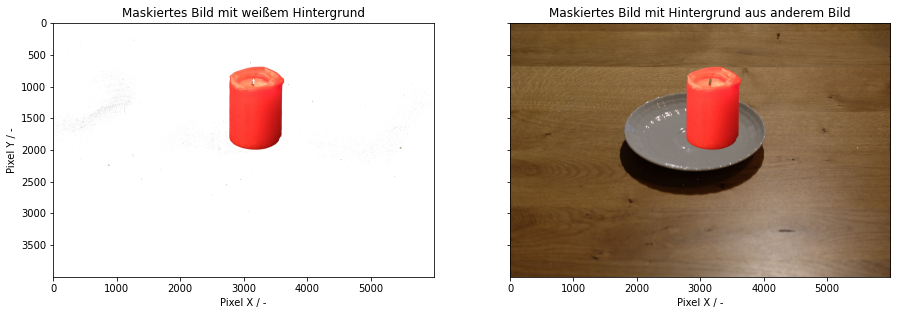

In [4]:
# Laden der Bilddateien als Numpy.array
image_object = plt.imread('bilder/freistellen_objekt.jpg')
image_background = plt.imread('bilder/freistellen_hintergrund.jpg')

# Definition des Schwellenwertes und Erstellen einer Maske anhand des roten Farbkanals
th_red = 120
red_channel = image_object[:,:,0]
mask = np.where(red_channel > th_red, 1, 0)

# Maskieren des Bildes anhand des roten Farbkanals; Maskierten Bereichen wird der Wert 255 zugewiesen. Somit ergibt sich in Summe ein weißer Hintergrund
masked_img_red = np.where(mask==1, image_object[:,:,0],255)
masked_img_green = np.where(mask==1, image_object[:,:,1],255)
masked_img_blue = np.where(mask==1, image_object[:,:,2],255)
masked_img_rgb = np.dstack((masked_img_red, masked_img_green, masked_img_blue)).astype('uint8')

# Maskieren des Bildes anhand des roten Farbkanals; Maskierten Bereichen werden die Pixel des Hintergrundbildes zugewiesen.
new_img_red = np.where(mask==1, image_object[:,:,0],image_background[:,:,0])
new_img_green = np.where(mask==1, image_object[:,:,1],image_background[:,:,1])
new_img_blue = np.where(mask==1, image_object[:,:,2],image_background[:,:,2])
new_img_rgb = np.dstack((new_img_red, new_img_green, new_img_blue)).astype('uint8')

# Darstellen der überlagerten Bilder
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7.5), sharey=True)
ax1.set_xlabel("Pixel X / -")
ax2.set_xlabel("Pixel X / -")
ax1.set_ylabel("Pixel Y / -")
ax1.set_title("Maskiertes Bild mit weißem Hintergrund")
ax2.set_title("Maskiertes Bild mit Hintergrund aus anderem Bild")

ax1.imshow(masked_img_rgb)
ax2.imshow(new_img_rgb)
plt.show()

## Gammakorrektur
In der digitalen Bildverarbeitung dient die Gammakorrektur zur Überführung linearer physikalischer Zusammenhänge in die nichtlineare menschliche Wahrnehmung. Die Gammafunktion ist eine Potenzfunktion, die z.B. im Rahmen der Farbraumumwandlung in den sRGB Standard die Rohdaten eines Bildes, wie die Pixelhelligkeit $I_{in}$ in eine  entsprechende Ausgabegröße $I_{out}$ umwandelt.
Die Gammafunktion kann wie folgt beschrieben werden:

$$I_{out} = {I_{in}}^\gamma$$

Dabei gilt: 
$0 \leq I_{in} \leq 1$
und
$0 \leq I_{out} \leq 1$

### Aufgabe
Führen Sie Gammakorrektur für die Faktoren $\gamma = 2.2$ und $\gamma = 0.5$ durch. Gehen Sie dazu wie folgt vor:
1. Erstellen Sie zuerst zwei "Lookup-Tabellen" (LUT) in der Sie alle möglichen Pixelwerte $I_{in}$ in einem linearen Wertebereich von 8bit mit den durch die Gamma-Funktion korrigierten Werten $I_{out}$ verknüpfen. Erstellen die für beide $\gamma$-Werte unabhängige LUT.
2. Plotten Sie jeweils die Abhängigkeit zwischen $I_{in}$ und $I_{out}$.
3. Führen Sie anschließend die Gammakorrektur für sämtliche Pixel der drei Farbkanäle des Bildes durch. Verwenden Sie hierzu die Möglichkeit der Indizierung eines `Numpy.array` nach dem Schema
    ```
    I_out = lut[I_in]
    ```
Verwenden Sie das nachfolgende Bild "Gammakorrektur.jpg" für diese Aufgabe:

:::{figure-md} fig-image-gammakorrektur
<img src="./bilder/Gammakorrektur.jpg" width="100%">

Bild mit falscher Gammakorrektur.
:::

### Lösungsvorschlag

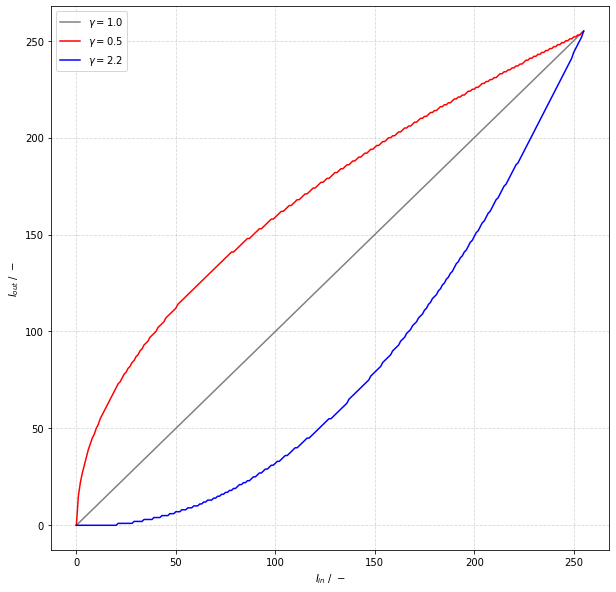

In [5]:
# Definition der Gammawerte
gamma_1 = 0.5
gamma_2 = 2.2

# Definition der Farbtiefe
color_depth = range(2**8)

# Zusammenhang zwischen I_in und I_out über die Gammafunktion
i_out = lambda i_in, gamma : 255 * (i_in/255)**gamma

# Berechung der Lookup Tabellen (LUT)
gamma_1_lut  = np.array([i_out(i_in, gamma_1) for i_in in color_depth], dtype=np.uint8)
gamma_2_lut  = np.array([i_out(i_in, gamma_2) for i_in in color_depth], dtype= np.uint8)

# Plot der LUTs
fig = plt.figure(figsize=(10,10))
plt.plot(color_depth, color_depth, color='gray', label="$\gamma = 1.0$")
plt.plot(color_depth, gamma_1_lut, color='red', label="$\gamma = 0.5$")
plt.plot(color_depth, gamma_2_lut, color = 'blue', label="$\gamma = 2.2$")
plt.xlabel("$I_{in}~/~-$")
plt.ylabel("$I_{out}~/~-$")
plt.grid(linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.show()

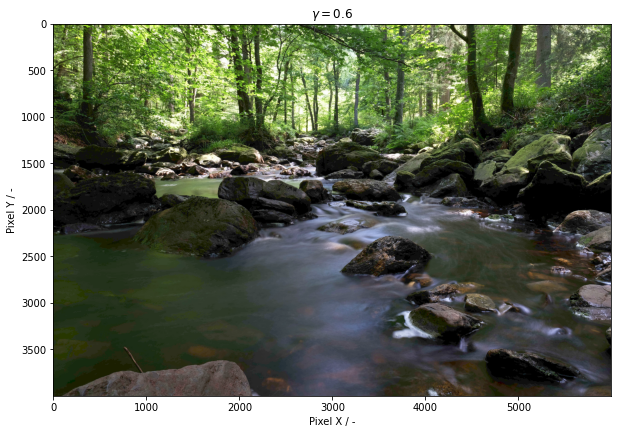

In [6]:
# Gammakorrektur mit y = 0.5
image = plt.imread('bilder/Gammakorrektur.jpg')
image_gamma1 = gamma_1_lut[image]
fig = plt.figure(figsize=(10,10))
plt.imshow(image_gamma1)
plt.title("$\gamma = 0.6$")
plt.xlabel("Pixel X / -")
plt.ylabel("Pixel Y / -")
plt.show()

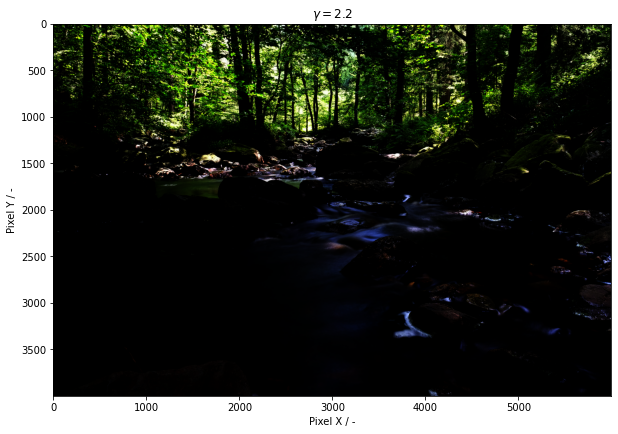

In [7]:
# Gammakorrektur mit y = 2.2
image_gamma2 = gamma_2_lut[image]
fig = plt.figure(figsize=(10,10))
plt.imshow(image_gamma2)
plt.title("$\gamma = 2.2$")
plt.xlabel("Pixel X / -")
plt.ylabel("Pixel Y / -")
plt.show()